In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Dropout, Flatten, Dense, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau

In [3]:
df1 = pd.read_csv('drive/MyDrive/emotion_dataset/fer2013.csv')
df2 = pd.read_csv('drive/MyDrive/emotion_dataset/affectnet.csv')

In [4]:
df = pd.concat([df1[['pixels','emotion']],df2])

In [5]:
print(df.info())
print("\nMissing data\n\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63301 entries, 0 to 27413
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   pixels   63301 non-null  object
 1   emotion  63301 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ MB
None

Missing data

 pixels     0
emotion    0
dtype: int64


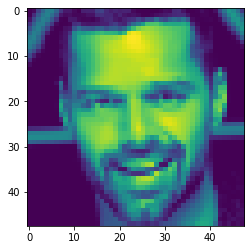

In [6]:
imgdisp = df.iloc[40000]['pixels'].split(" ")
imgdisp = np.array(imgdisp, dtype = 'uint8')
imgdisp = imgdisp.reshape(48,48)
plt.imshow(imgdisp)

[Text(0, 0, 'angry'),
 Text(0, 0, 'disgust'),
 Text(0, 0, 'fear'),
 Text(0, 0, 'happy'),
 Text(0, 0, 'sad'),
 Text(0, 0, 'surprise'),
 Text(0, 0, 'neutral')]

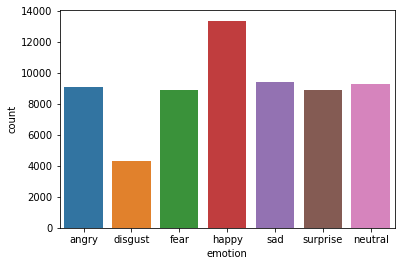

In [7]:
emotions = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
ax = sns.countplot(x = df['emotion'],  data = df)
ax.set_xticklabels(emotions)

In [8]:
x, y = [], [] 

for index, row in df.iterrows():
    #The pixels column in the dataframe is given in the form of string
    #so the string is converted into a list of integers 
    img = row['pixels'].split(" ")
    x.append(np.array(img))
    y.append(row['emotion'])

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=0)

In [10]:
x_train = np.array(x_train, dtype = 'uint8')
y_train = np.array(y_train, dtype = 'uint8')
x_test = np.array(x_test, dtype = 'uint8')
y_test = np.array(y_test, dtype = 'uint8')

In [11]:
y_train= to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

In [12]:
x_train = x_train.reshape(x_train.shape[0], 48, 48, 1)
x_test = x_test.reshape(x_test.shape[0], 48, 48, 1)

In [13]:
# Applying augmentations to images in training data as
# well as carrying out normalization

datagen = ImageDataGenerator(
    rescale=1./255,
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

testgen = ImageDataGenerator(rescale=1./255)

In [14]:
datagen.fit(x_train)

In [15]:
batch_size = 64
train_flow = datagen.flow(x_train, y_train, batch_size=batch_size) 
test_flow = testgen.flow(x_test, y_test, batch_size=batch_size)

In [16]:
input_shape=(48,48,1)
input = Input(shape=input_shape, name='input')

#1st conv layer

conv2d_1 = Conv2D(
            filters=64,
            kernel_size=(3,3),
            activation='relu',
            padding='same',
            name='conv2d_1'
        )(input)
batchnorm_1 = BatchNormalization(name='batchnorm_1')(conv2d_1)
conv2d_2 = Conv2D(
            filters=64,
            kernel_size=(3,3),
            activation='relu',
            padding='same',
            name='conv2d_2'
        )(batchnorm_1)
batchnorm_2 = BatchNormalization(name='batchnorm_2')(conv2d_2)
maxpool2d_1 = MaxPooling2D(pool_size=(2,2), name='maxpool2d_1')(batchnorm_2)
dropout1 = Dropout(0.3, name='dropout_1')(maxpool2d_1)

In [17]:
#2nd conv layer

conv2d_3 = Conv2D(
            filters=128,
            kernel_size=(3,3),
            activation='relu',
            padding='same',
            name='conv2d_3'
        )(dropout1)
batchnorm_3 = BatchNormalization(name='batchnorm_3')(conv2d_3)
conv2d_4 = Conv2D(
            filters=128,
            kernel_size=(3,3),
            activation='relu',
            padding='same',
            name='conv2d_4'
        )(batchnorm_3)
batchnorm_4 = BatchNormalization(name='batchnorm_4')(conv2d_4)
conv2d_5 = Conv2D(
            filters=128,
            kernel_size=(3,3),
            activation='relu',
            padding='same',
            name='conv2d_5'
        )(batchnorm_4)
batchnorm_5 = BatchNormalization(name='batchnorm_5')(conv2d_5)
maxpool2d_2 = MaxPooling2D(pool_size=(2,2), name='maxpool2d_2')(batchnorm_5)
dropout2 = Dropout(0.3, name='dropout_2')(maxpool2d_2)

In [18]:
#3rd conv layer

conv2d_6 = Conv2D(
            filters=256,
            kernel_size=(3,3),
            activation='relu',
            padding='same',
            name='conv2d_6'
        )(dropout2)
batchnorm_6 = BatchNormalization(name='batchnorm_6')(conv2d_6)
conv2d_7 = Conv2D(
            filters=256,
            kernel_size=(3,3),
            activation='relu',
            padding='same',
            name='conv2d_7'
        )(batchnorm_6)
batchnorm_7 = BatchNormalization(name='batchnorm_7')(conv2d_7)
conv2d_8 = Conv2D(
            filters=256,
            kernel_size=(3,3),
            activation='relu',
            padding='same',
            name='conv2d_8'
        )(batchnorm_7)
batchnorm_8 = BatchNormalization(name='batchnorm_8')(conv2d_8)
maxpool2d_3 = MaxPooling2D(pool_size=(2,2), name='maxpool2d_3')(batchnorm_8)
dropout3 = Dropout(0.3, name='dropout_3')(maxpool2d_3)

In [19]:
num_classes = 7

flatten_1 = Flatten(name = 'flatten')(dropout3)
dense_1 = Dense(256, activation='relu', name = 'dense_1')(flatten_1)
batchnorm_9 = BatchNormalization(name='batchnorm_9')(dense_1)
dropout4 = Dropout(0.3, name='dropout_4')(batchnorm_9)
dense_2 = Dense(128, activation='relu', name = 'dense_2')(dropout4)
batchnorm_10 = BatchNormalization(name='batchnorm_10')(dense_2)
dropout5 = Dropout(0.3, name='dropout_5')(batchnorm_10)
output = Dense(num_classes, activation='softmax', name = 'dense_3')(dropout5)

In [20]:
model = Model(inputs =input, outputs = output)
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 48, 48, 1)]       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        640       
                                                                 
 batchnorm_1 (BatchNormaliza  (None, 48, 48, 64)       256       
 tion)                                                           
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 64)        36928     
                                                                 
 batchnorm_2 (BatchNormaliza  (None, 48, 48, 64)       256       
 tion)                                                           
                                                                 
 maxpool2d_1 (MaxPooling2D)  (None, 24, 24, 64)        0     

In [21]:
optim = optimizers.Adam(0.001)
model.compile( 
    optimizer = optim, 
    loss="categorical_crossentropy", 
    metrics=["accuracy"] )

In [22]:
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.00005,
    patience=11,
    verbose=1,
    restore_best_weights=True,
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=7,
    min_lr=1e-7,
    verbose=1,
)

callbacks = [
    early_stopping,
    lr_scheduler,
]

In [23]:
detect_model = model.fit(
    train_flow,
    steps_per_epoch=len(x_train) / batch_size,
    epochs=100,
    callbacks=callbacks,
    use_multiprocessing=True,
    validation_data=test_flow
)

Epoch 1/100
791/791 [==============================] - 55s 52ms/step - loss: 2.0618 - accuracy: 0.1982 - val_loss: 1.9874 - val_accuracy: 0.2146 - lr: 0.0010
Epoch 2/100
791/791 [==============================] - 40s 50ms/step - loss: 1.7572 - accuracy: 0.3137 - val_loss: 1.7743 - val_accuracy: 0.3125 - lr: 0.0010
Epoch 3/100
791/791 [==============================] - 41s 52ms/step - loss: 1.4672 - accuracy: 0.4404 - val_loss: 1.5588 - val_accuracy: 0.3930 - lr: 0.0010
Epoch 4/100
791/791 [==============================] - 40s 51ms/step - loss: 1.3293 - accuracy: 0.4947 - val_loss: 1.3604 - val_accuracy: 0.4814 - lr: 0.0010
Epoch 5/100
791/791 [==============================] - 41s 52ms/step - loss: 1.2527 - accuracy: 0.5286 - val_loss: 1.3892 - val_accuracy: 0.4654 - lr: 0.0010
Epoch 6/100
791/791 [==============================] - 40s 51ms/step - loss: 1.1977 - accuracy: 0.5526 - val_loss: 1.4442 - val_accuracy: 0.4570 - lr: 0.0010
Epoch 7/100
791/791 [==============================]

In [24]:
model_json = model.to_json()
with open("drive/MyDrive/model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("drive/MyDrive/model.h5")
print("Saved model to disk")

Saved model to disk
